# DAND Term 1 Project 3
Jesse Fredrickson

8/15/18

## TMDb movie data

[Link](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1534386214169000)

In this project, I will conduct my own data analysis and document my findings in this jupyter notebook. Please note that all findings are tentative and based simply on observations, not on inferential statistics or machine learning. Correlation does not imply causation.

### Brainstorming

In [165]:
# imports, loads, and magics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits import mplot3d
import seaborn as sns
import math

%matplotlib inline

path = 'C:/Users/Jesse/Documents/PyData/DAND_t1_p3/'
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [166]:
# don't care about some columns immediately
dropcols = ['homepage', 'tagline', 'overview']
df.drop(dropcols, axis=1, inplace=True)

In [167]:
# check for duplicates in all columns
df.drop_duplicates(inplace = True)
for col in df.columns:
    print('Duplicates in ' + col + ': ' + str(df.duplicated(col).sum()))

Duplicates in id: 0
Duplicates in imdb_id: 9
Duplicates in popularity: 51
Duplicates in budget: 10308
Duplicates in revenue: 6163
Duplicates in original_title: 294
Duplicates in cast: 145
Duplicates in director: 5797
Duplicates in keywords: 2060
Duplicates in runtime: 10618
Duplicates in genres: 8825
Duplicates in production_companies: 3419
Duplicates in release_date: 4956
Duplicates in vote_count: 9576
Duplicates in vote_average: 10793
Duplicates in release_year: 10809
Duplicates in budget_adj: 8251
Duplicates in revenue_adj: 6025


In [168]:
# examine duplicates
df[df['imdb_id'].duplicated()]; # reveals that imdb_id duplicates are all Nan... that's fine

# want to drop all original title duplicates while preserving all relevant data.
# Saving only the first occurrance might throw away valuable data
# on way to do this would be to groupby original_title, replace all 0s with np.nan, ffill and bfill
# then drop duplicates.
def fillmeupdaddy(df, col):
    df.groupby([col]).ffill().bfill(inplace=True)
    df.drop_duplicates(['original_title'], inplace=True)
    return df

df.replace(0,np.nan)
clean_df = fillmeupdaddy(df, 'original_title')

In [169]:
for col in df.columns:
    print('Duplicates in ' + col + ': ' + str(df.duplicated(col).sum()))

Duplicates in id: 0
Duplicates in imdb_id: 9
Duplicates in popularity: 48
Duplicates in budget: 10020
Duplicates in revenue: 5981
Duplicates in original_title: 0
Duplicates in cast: 141
Duplicates in director: 5571
Duplicates in keywords: 2024
Duplicates in runtime: 10328
Duplicates in genres: 8571
Duplicates in production_companies: 3315
Duplicates in release_date: 4814
Duplicates in vote_count: 9294
Duplicates in vote_average: 10499
Duplicates in release_year: 10515
Duplicates in budget_adj: 8016
Duplicates in revenue_adj: 5853


In [170]:
# Now count Nans
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      74
director                  43
keywords                1467
runtime                    0
genres                    23
production_companies    1019
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

It is worth noting that although the `clean_df` dataframe is clean of duplicates, it has a number of NaNs in some columns. It may be necessary to have to remove NaNs for some analyses.

### Exploratory Data Analysis
(the fun part)

Investigations:

1) Histograms of vote_average, release_year

2) Bucketize release year and look at adjusted budget and revenue

3) Add rows to break out by actor and get mean score per actor

4) Correlation matrix to see what effects score the most - actor, genre, budget, director

Will need new dataframes with extra rows for actor and genre

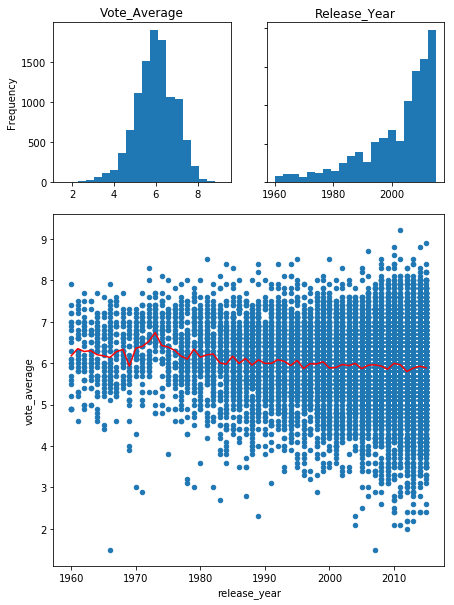

In [171]:
# examine votes by year
gs = gridspec.GridSpec(3, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[-2:, :])
clean_df['vote_average'].plot(kind='hist', bins=20, title='Vote_Average', ax = ax1, figsize=(7,10));
clean_df['release_year'].plot(kind='hist', bins=20, title='Release_Year', ax = ax2, sharey = ax1);
clean_df.plot.scatter(x='release_year', y='vote_average', ax = ax3);

line_x = clean_df.groupby(['release_year'])['vote_average'].mean().index
line_y = clean_df.groupby(['release_year'])['vote_average'].mean().values

ax3.plot(line_x,line_y,color='r');

Interestingly, although the number of movies being produced per year is increasing, the mean rating for each is gradually decreasing. It is uncertain if this is related to the quality of the movie, or other factors (viewing experience, viewer factors).

To investigate this further, we can look at the adjusted budget of movies per year, and see if this has a correlation with the vote score

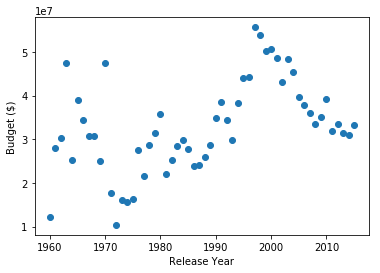

In [172]:
# first look at the mean budget per movie per year
# important that we exlude listings where the budget is 0
clean_budget = clean_df.query('budget_adj > 0')
budyr = clean_budget.groupby(['release_year'])['budget_adj'].mean()

plt.scatter(x = budyr.index, y = budyr.values);
plt.xlabel('Release Year');
plt.ylabel('Budget ($)');

Interesting that the average budget for movies peaked around 2000, and has been decreasing since. That is not what I would have expected. Budgets began decreasing  before the 2008 recession and have actually somewhat leveled out since

C:\Users\Jesse\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(5.76248508946322, 6.265149105367792)

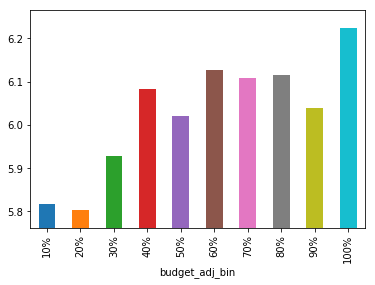

In [173]:
# next, bin budget_adjusted into 10 percentiles and find the mean voter rating per bin
b_labels = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
clean_budget['budget_adj_bin'] = pd.qcut(clean_budget['budget_adj'], q=10, labels = b_labels)
# scatter(x = clean_budget['budget_adj_bin'], y = clean_budget.groupby(['budget_adj_bin'])['vote_average'].mean())
bud_bin = clean_budget.groupby(['budget_adj_bin'])['vote_average'].mean()
bud_bin.plot(kind='bar');
low = bud_bin.min()
high = bud_bin.max()
plt.ylim(low-.1*(high-low), high+.1*(high-low))

Again, interesting that once you are in the top 60% of movie budgets, there is a diminishing return on user satisfaction as you increase the budget until you are in the top 10% of movie budgets. Now let's get really fancy and add in the release year variable into the mix

In [174]:
type(clean_budget['release_year'][0])

numpy.int64

C:\Users\Jesse\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


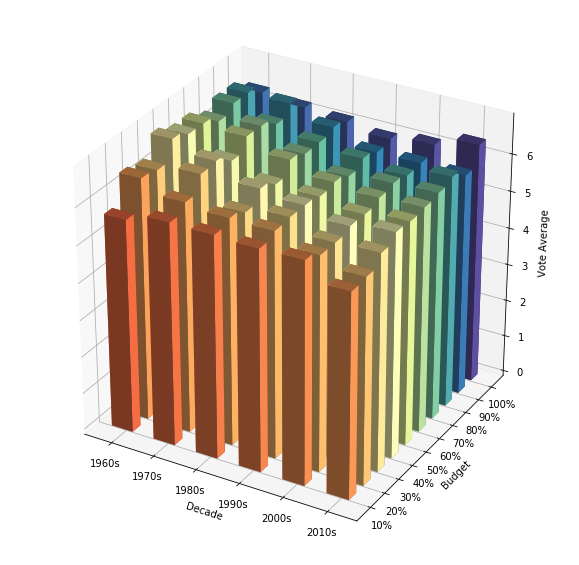

In [175]:
# x = years
# y = buget bucket
# z = voter rating
decades = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
clean_budget['decade'] = pd.cut(clean_budget['release_year'], bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020], labels = decades)

# create multi index series for plotting
cb3d = clean_budget.set_index(['decade', 'budget_adj_bin']).groupby(level=[0,1])['vote_average'].mean()
cb3d = pd.DataFrame(cb3d)

# Setup
L = []
for i, group in cb3d.groupby(level=1)['vote_average']:
    L.append(group.values)
z = np.hstack(L).ravel()

xlabels = cb3d.index.get_level_values('decade').unique()
ylabels = cb3d.index.get_level_values('budget_adj_bin').unique()
x = np.arange(xlabels.shape[0])
y = np.arange(ylabels.shape[0])

x_M, y_M = np.meshgrid(x, y, copy=False)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
  
# Making the intervals in the axes match with their respective entries
ax.w_xaxis.set_ticks(x + 0.5/2.)
ax.w_yaxis.set_ticks(y + 0.5/2.)

# Renaming the ticks as they were before
ax.w_xaxis.set_ticklabels(xlabels)
ax.w_yaxis.set_ticklabels(ylabels)

# Labeling the 3 dimensions
ax.set_xlabel('Decade')
ax.set_ylabel('Budget')
ax.set_zlabel('Vote Average')

# Choosing the range of values to be extended in the set colormap
values = np.linspace(0.2, 1., x_M.ravel().shape[0])

# Selecting an appropriate colormap
colors = plt.cm.Spectral(values)
#colors = plt.cm.jet(values.flatten()/float(values.max()))
ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.5, dy=0.5, dz=z, color=colors)
plt.show()

Here is what I suspected and was looking for. You can see that in earlier decades, low and mid budget movies got higher average vote scores, but this trend has changed post 2000. I am guessing that some movies became 'cult-classics' without a high budget, whereas now many movies rely on high budget effects to wow audiences. Again, just guessing here.

Next I will look at popular actors and directors, and see which has more of an effect on popularity

In [184]:
# CAST
# First need a new dataframe where each film has one actor
clean_df.head()
if type(clean_df['cast'][0]) == str:
    clean_df['cast']  = clean_df['cast'].str.split('|')

In [188]:
# for each film, parse cast column as a list separated by | (append rows)
#cast_df = clean_df['cast'].apply(lambda x: list(x.split('|')))

column_to_explode = 'cast'
cast_df = (clean_df
       .set_index([x for x in clean_df.columns if x != column_to_explode])[column_to_explode]
       .apply(pd.Series)
       .stack()
       .reset_index())
cast_df = cast_df.rename(columns={
          cast_df.columns[-2]:'exploded_{}_index'.format(column_to_explode),
          cast_df.columns[-1]: '{}_exploded'.format(column_to_explode)})
cast_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,exploded_cast_index,cast_exploded
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,0,Chris Pratt
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1,Bryce Dallas Howard
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2,Irrfan Khan
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,3,Vincent D'Onofrio
4,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,4,Nick Robinson


In [222]:
cast_counts = cast_df.groupby(['cast_exploded'])['id'].count().sort_values(ascending=False)

In [226]:
# unintended: if an actor showed up in a film that happened to do well, they'll get too much credit.
# need to find a way to weight by appearances. Perhaps a correlation matrix of some kind
cast_means = cast_df.groupby(['cast_exploded'])['vote_average'].mean().sort_values(ascending=False)
cast_df.groupby(['cast_exploded']).filter(lambda x: len(x)>6).groupby(['cast_exploded'])['vote_average'].mean().sort_values(ascending=False)
# cast_joined = pd.concat([cast_counts, cast_means], axis=1)
# cast_joined['id'].corr(cast_joined['vote_average'])

cast_exploded
Louis C.K.               7.290000
Pierre Coffin            7.057143
Terry Gilliam            7.042857
Michael Moore            7.014286
Domhnall Gleeson         7.012500
Matt Smith               7.012500
Kevin Conroy             7.007692
George W. Bush           6.950000
Benedict Cumberbatch     6.892308
Graham Chapman           6.885714
Paul McCartney           6.880000
Daniel Radcliffe         6.875000
Tupac Shakur             6.857143
Emma Watson              6.838462
John DiMaggio            6.836364
Kimberly Elise           6.828571
Jared Leto               6.814286
Carey Mulligan           6.809091
Peter Sellers            6.790000
Paddy Considine          6.780000
Cybill Shepherd          6.771429
Edward James Olmos       6.760000
Leonardo DiCaprio        6.755172
John Lennon              6.750000
George Harrison          6.750000
Ben Whishaw              6.740000
Brad Pitt                6.738462
Ken Stott                6.737500
Nick Frost               6.733333


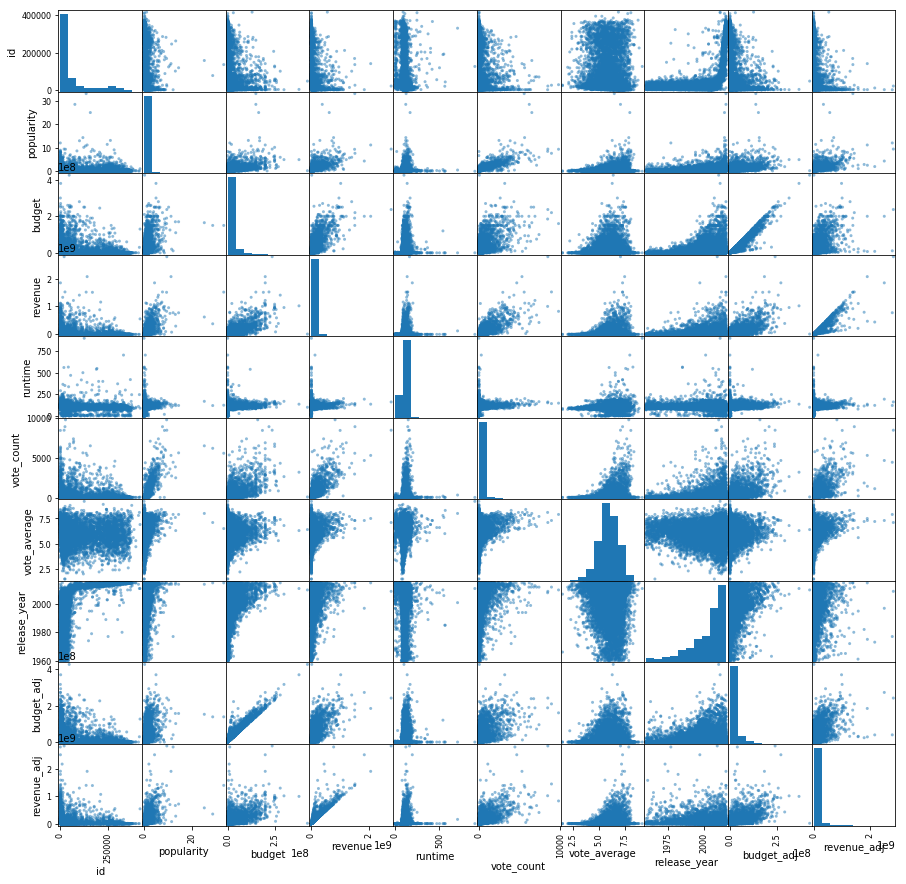

In [204]:
pd.plotting.scatter_matrix(clean_df, figsize=(15,15));